In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row', 14)
pd.set_option('display.max_column', 14)

In [3]:
data = pd.read_excel('Manoeuvers_Ath.xlsx')

In [4]:
data.head()

,Date,Maneuver type,Delta-t,Delta Inc X,Delta Inc Y,Delta Ecc X,Delta Ecc Y,Delta Energy,Delta Energy Previous,Delta Energy Next,Delta Moment,Delta Out-of-plane,Delta Along-track,Delta Along-track avg
0,24140.749659,0,1.224519,0.000010,0.000258,-0.000058,0.000132,-46.793223,0.000000,99.526227,0.000517,-4628.698901,-28711.657464,0.000000
1,24141.519689,1,0.770030,-0.000025,-0.000213,0.000075,-0.000106,99.526227,-46.793223,-4.871059,0.000429,35293.385259,2776.854666,15744.256065
2,24142.516965,0,0.997276,-0.000015,0.000030,-0.000012,-0.000009,-4.871059,99.526227,-16.184467,0.000067,15963.393632,-10739.880071,1838.528849
3,24144.511512,0,1.994546,-0.000018,0.000027,0.000005,0.000001,-16.184467,-4.871059,-101.914365,0.000065,18457.947107,-8576.802672,5298.810851
4,24145.237001,0,0.725489,0.000026,-0.000008,0.000027,0.000033,-101.914365,-16.184467,84.064344,0.000054,-7575.844344,-30462.847067,-13084.512230


# 1. Exploratory Data Analysis

## Objectif :
- Compréhension des données
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **variable target** : Maneuver type	
- **lignes et colonnes** : (1559, 14)
- **types de variables** : qualitatives : 13, quantitatives : 1
- **Analyse des valeurs manquantes** :
    - Aucune valeur manquante

#### Analyse de Fond :
- **Visualisation de la target** :
      Maneuver type:
     - **Value = 0, on a 1267 acune manoeuvre**
     - **Value = 1, on a 195 manoeuvres East/West**
     - **Value = 2, 97   manoeuvres South/North** 
    
    
    
- **Signification des variables** :
    -  variables continues standardisées, skewed (asymétriques), Delta Ecc
    

- **Relation Variables / Target** :
   
    - target/Delta-t : 
    
    - target / Delta Energy : 
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - Delta Energy / Maneuver type :  corrélation entre les deux
    - Deta Moment / Maneuver type : 


### hypotheses nulle (H0): 

- 

    

In [4]:
df = data.copy()

In [13]:
#Détection du nombre de lignes et colonnes
df.shape

(1559, 14)

In [14]:
#Détection du type de variable
df.dtypes.value_counts()

float64    13
int64       1
dtype: int64

In [85]:
#Toujours dans la phase d'analyse on affiche notre dataset dans une image
df.isna()

,Date,Maneuver type,Delta-t,Delta Inc X,Delta Inc Y,Delta Ecc X,Delta Ecc Y,Delta Energy,Delta Energy Previous,Delta Energy Next,Delta Moment,Delta Out-of-plane,Delta Along-track,Delta Along-track avg
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1555,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1556,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1557,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

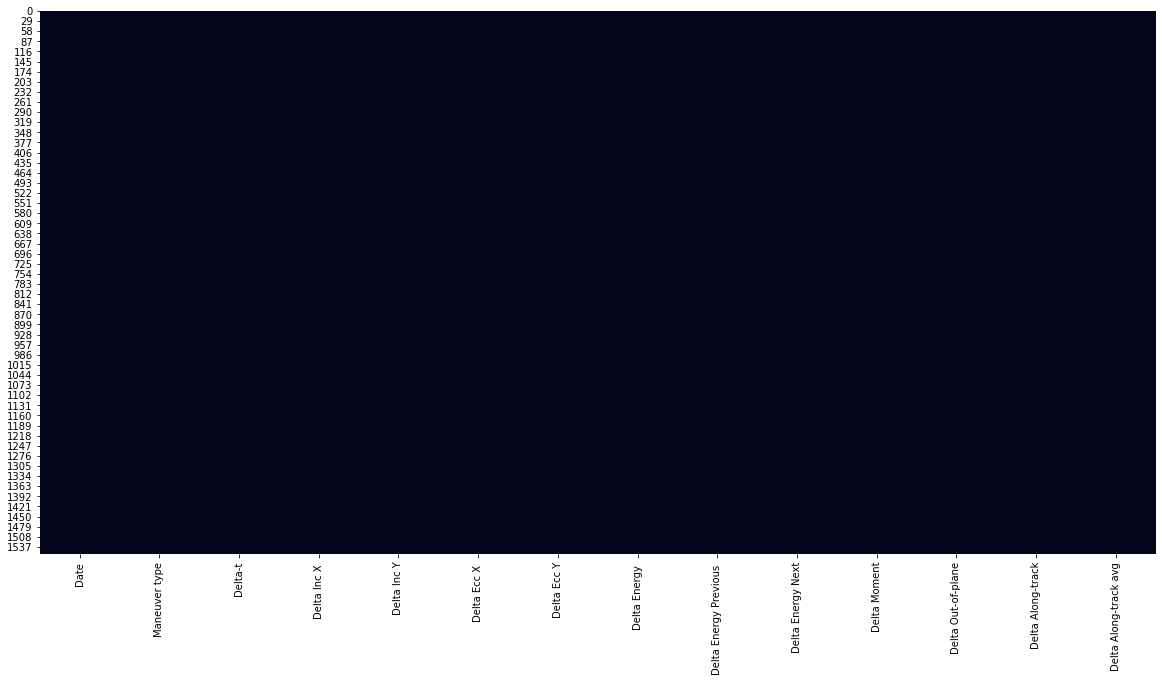

In [86]:
#Cette figure illustre parfaitement le fait que notre dataset n'a aucune valeur manquante
#Ce qui est une très bonne nouvelle hiihi ^^

plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [5]:
#Suppression de  Delta Out-of-plane, Delta Along-track et Delta Along-track avg
#Car pas important et données de calcul de ces valeurs manquantes dans le word

df = df.drop('Delta Out-of-plane', axis=1)
df = df.drop('Delta Along-track', axis=1)
df = df.drop('Delta Along-track avg', axis=1)


In [16]:
df.head()

,Date,Maneuver type,Delta-t,Delta Inc X,Delta Inc Y,Delta Ecc X,Delta Ecc Y,Delta Energy,Delta Energy Previous,Delta Energy Next,Delta Moment
0,24140.749659,0,1.224519,0.000010,0.000258,-0.000058,0.000132,-46.793223,0.000000,99.526227,0.000517
1,24141.519689,1,0.770030,-0.000025,-0.000213,0.000075,-0.000106,99.526227,-46.793223,-4.871059,0.000429
2,24142.516965,0,0.997276,-0.000015,0.000030,-0.000012,-0.000009,-4.871059,99.526227,-16.184467,0.000067
3,24144.511512,0,1.994546,-0.000018,0.000027,0.000005,0.000001,-16.184467,-4.871059,-101.914365,0.000065
4,24145.237001,0,0.725489,0.000026,-0.000008,0.000027,0.000033,-101.914365,-16.184467,84.064344,0.000054


### Examen de la colonne target

In [6]:
df['Maneuver type'].value_counts()

0    1267
1     195
2      97
Name: Maneuver type, dtype: int64

### histogrames des variables continues 

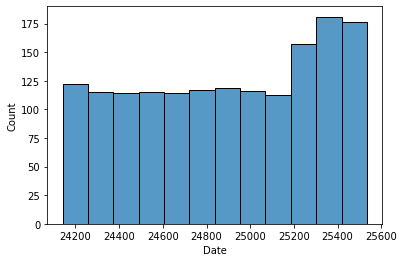

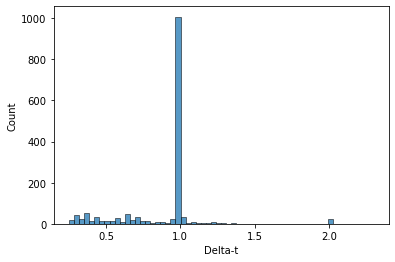

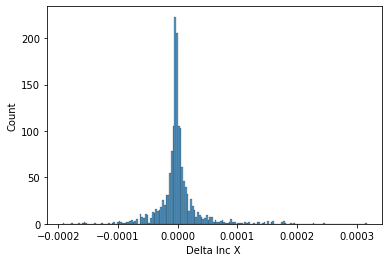

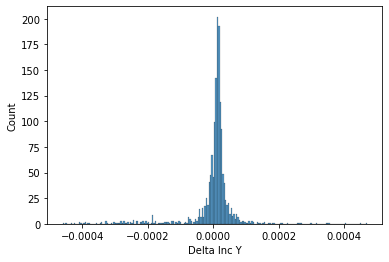

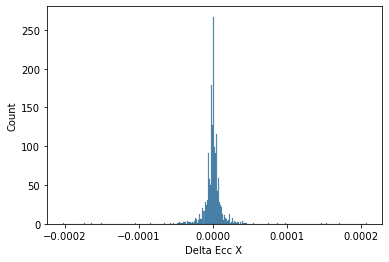

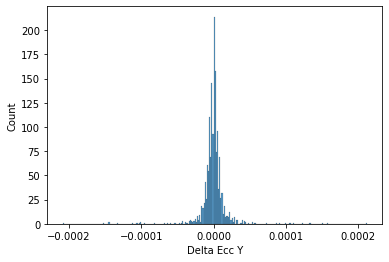

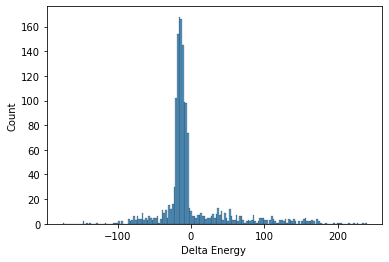

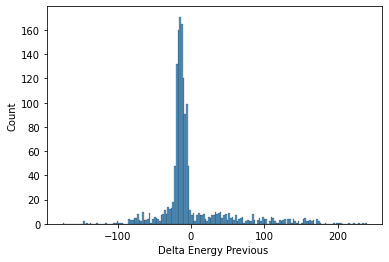

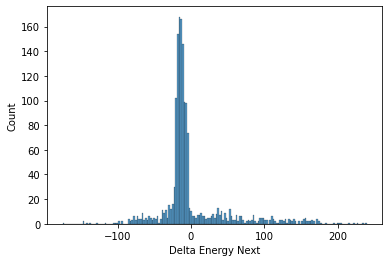

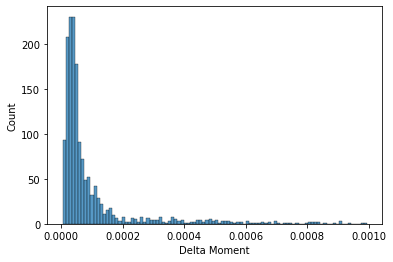

In [7]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.histplot(df[col])
    

## Relation Target / Variables
### Création de sous-ensembles East/West, South/North et None

In [114]:
eastW_df = df[df['Maneuver type'] == 1]

In [117]:
southN_df = df[df['Maneuver type'] == 2]

In [118]:
none_df = df[df['Maneuver type'] == 0]

### Relation Target / Delta-t

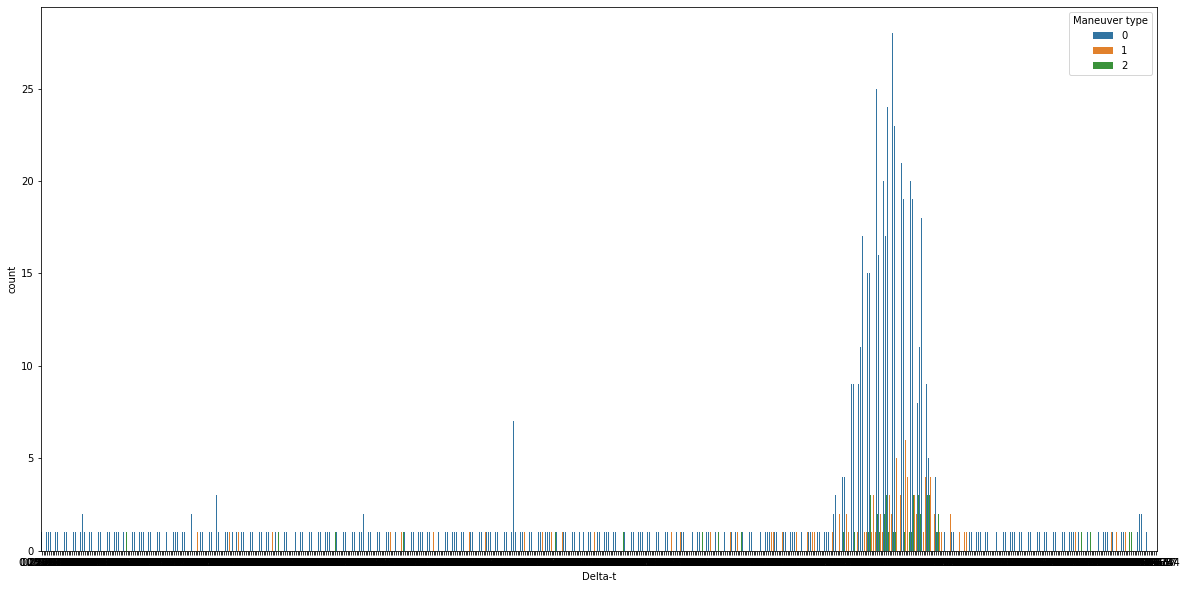

In [150]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Delta-t', hue='Maneuver type', data=df)
plt.show()

### Relation Target / Delta-Energy

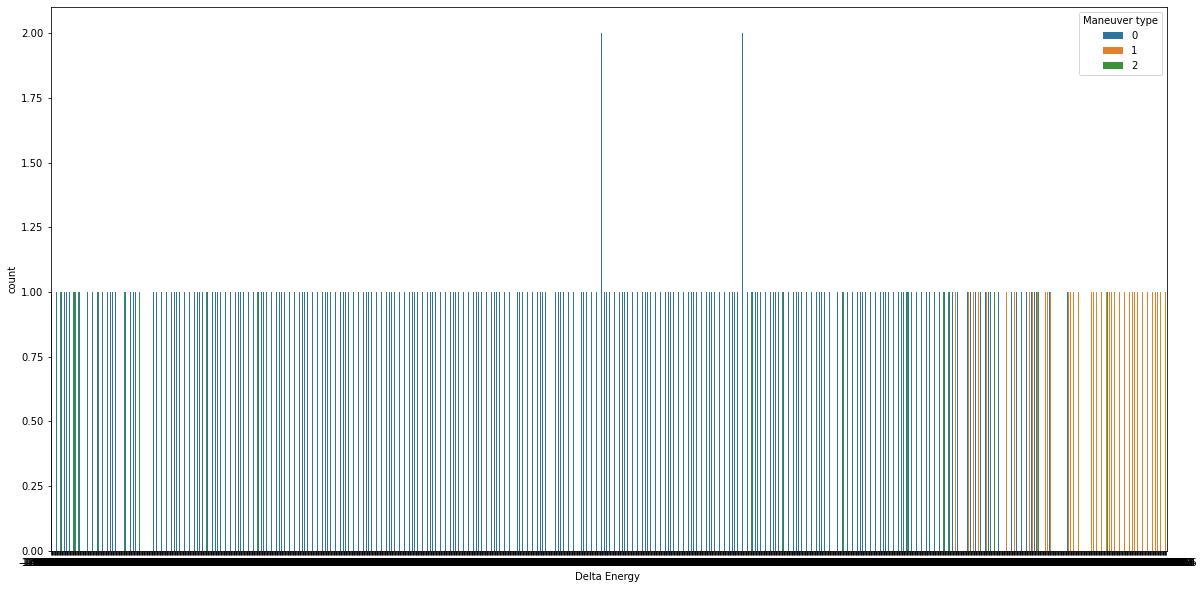

In [148]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Delta Energy ', hue='Maneuver type', data=df)
plt.show()

### Relation Target / Delta Moment

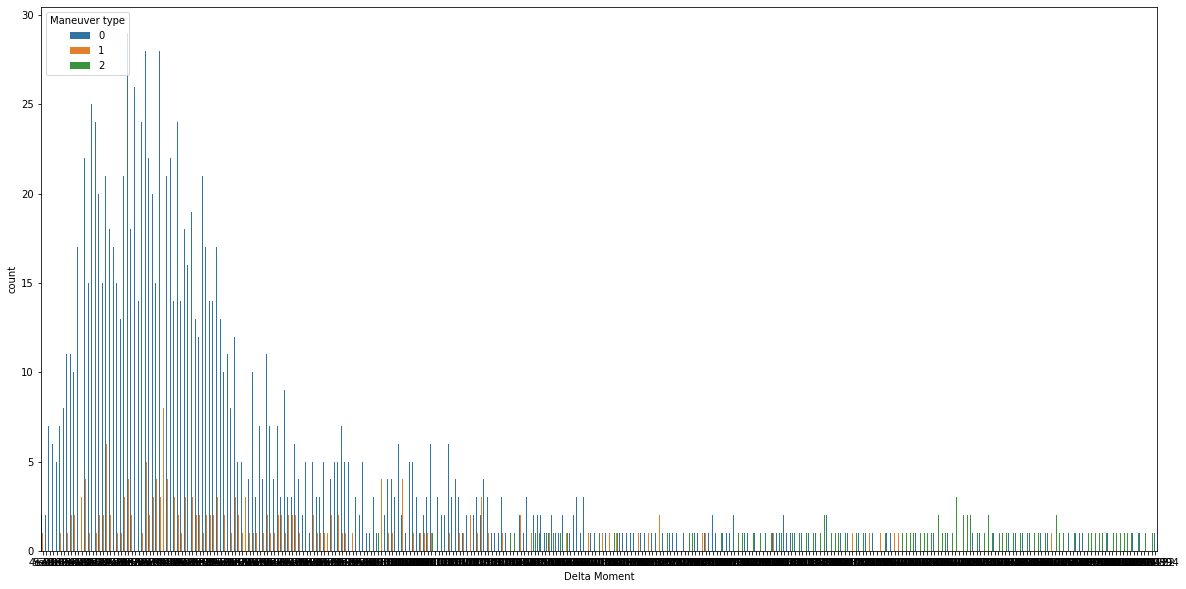

In [147]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Delta Moment', hue='Maneuver type', data=df)
plt.show()

## Analyse un peu plus Avancée
### Relation Variables / Variables

## Relation Ecc x / Delta Energy

In [164]:

df.corr()['Delta Energy '].sort_values()

Delta Energy Next        -0.167058
Delta Energy Previous    -0.167039
Delta Inc X              -0.061107
Delta Moment             -0.053924
Delta Ecc Y              -0.005366
Date                     -0.001923
Delta-t                   0.006948
Delta Ecc X               0.011861
Delta Inc Y               0.097566
Maneuver type             0.352029
Delta Energy              1.000000
Name: Delta Energy , dtype: float64

In [165]:

df.corr()['Delta Moment'].sort_values()

Delta Inc Y              -0.504090
Date                     -0.102756
Delta Energy Previous    -0.062981
Delta Energy             -0.053924
Delta Ecc X              -0.012610
Delta Energy Next        -0.008701
Delta Ecc Y               0.012006
Delta-t                   0.017220
Delta Inc X               0.270260
Maneuver type             0.563152
Delta Moment              1.000000
Name: Delta Moment, dtype: float64

# PRE-PROCESSING

In [9]:
df = data.copy()

In [18]:
df.head()
df.columns

Index(['Date', 'Maneuver type', 'Delta-t', 'Delta Inc X ', 'Delta Inc Y',
       'Delta Ecc X ', 'Delta Ecc Y', 'Delta Energy ',
       'Delta Energy Previous ', 'Delta Energy Next', 'Delta Moment',
       'Delta Out-of-plane', 'Delta Along-track', 'Delta Along-track avg'],
      dtype='object')

In [41]:
df = df.drop('Delta Out-of-plane', axis=1)
df = df.drop('Delta Along-track', axis=1)
df = df.drop('Delta Along-track avg', axis=1)
df = df.drop('Date', axis=1)
#df = df.drop('Delta-t', axis=1)
#df = df.drop('Delta Inc X ', axis=1)
#df = df.drop('Delta Ecc X ', axis=1)
#df = df.drop('Delta Ecc Y', axis=1)


In [40]:
df.head()

,Maneuver type,Delta-t,Delta Inc X,Delta Inc Y,Delta Ecc X,Delta Ecc Y,Delta Energy,Delta Energy Previous,Delta Energy Next,Delta Moment
0,0,1.224519,0.000010,0.000258,-0.000058,0.000132,-46.793223,0.000000,99.526227,0.000517
1,1,0.770030,-0.000025,-0.000213,0.000075,-0.000106,99.526227,-46.793223,-4.871059,0.000429
2,0,0.997276,-0.000015,0.000030,-0.000012,-0.000009,-4.871059,99.526227,-16.184467,0.000067
3,0,1.994546,-0.000018,0.000027,0.000005,0.000001,-16.184467,-4.871059,-101.914365,0.000065
4,0,0.725489,0.000026,-0.000008,0.000027,0.000033,-101.914365,-16.184467,84.064344,0.000054


## TrainTest - Nettoyage - Encodage

In [7]:
from sklearn.model_selection import train_test_split

## TrainTest (de 1 a 1000)- Nettoyage - Encodage


In [19]:
#Création de deux dataset un dataset pour la validation et un autre pour les tes
trainset, testset = train_test_split(df, test_size=0.358, shuffle=False)

In [ ]:
## Réseau de neuronnes

In [17]:
#Création de deux dataset un dataset pour la validation et un autre pour les tes
trainsetr, testsetr = train_test_split(df, test_size=0.358, shuffle=False)

In [106]:
trainset.shape

(1000, 10)

In [107]:
testset.shape

(559, 10)

In [108]:
trainset['Maneuver type'].value_counts()

0    790
1    141
2     69
Name: Maneuver type, dtype: int64

In [110]:
trainset.head()

,Maneuver type,Delta-t,Delta Inc X,Delta Inc Y,Delta Ecc X,Delta Ecc Y,Delta Energy,Delta Energy Previous,Delta Energy Next,Delta Moment
0,0,1.224519,0.000010,0.000258,-0.000058,0.000132,-46.793223,0.000000,99.526227,0.000517
1,1,0.770030,-0.000025,-0.000213,0.000075,-0.000106,99.526227,-46.793223,-4.871059,0.000429
2,0,0.997276,-0.000015,0.000030,-0.000012,-0.000009,-4.871059,99.526227,-16.184467,0.000067
3,0,1.994546,-0.000018,0.000027,0.000005,0.000001,-16.184467,-4.871059,-101.914365,0.000065
4,0,0.725489,0.000026,-0.000008,0.000027,0.000033,-101.914365,-16.184467,84.064344,0.000054


In [111]:
testset.head()

,Maneuver type,Delta-t,Delta Inc X,Delta Inc Y,Delta Ecc X,Delta Ecc Y,Delta Energy,Delta Energy Previous,Delta Energy Next,Delta Moment
1000,0,0.997257,0.000005,-0.000012,0.000007,0.000000,-14.550189,-13.513155,-15.932903,0.000027
1001,0,0.997254,0.000011,-0.000021,0.000005,0.000002,-15.932903,-14.550189,138.180332,0.000048
1002,1,0.997238,-0.000031,0.000025,0.000022,-0.000013,138.180332,-15.932903,-5.845286,0.000080
1003,0,0.997283,0.000002,0.000007,0.000004,-0.000000,-5.845286,138.180332,-15.493132,0.000014
1004,0,0.997280,0.000002,0.000016,0.000002,0.000004,-15.493132,-5.845286,-29.697718,0.000032


In [81]:
testset['Maneuver type'].value_counts()

0    481
1     54
2     28
Name: Maneuver type, dtype: int64

#### Retrait du dataset la valeur 0 pour le cas ou il y'a pas de maneuve 
#### et entrainer le model juste avec 1 et 2  valeurs présentes dans le dataset initial


In [11]:
#def removeValue:
 #   for i in testset['Maneuver type']
  #   if i==0:
   #     testset.
testset.drop( testset[ testset['Maneuver type'] == 0 ].index, inplace=True)    

C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
testset['Maneuver type'].value_counts()

1    54
2    28
Name: Maneuver type, dtype: int64

In [18]:
 #inutile avec ce dataset acr aucunes valeurs manquantes et toutes les valeurs sont deja encodées
def preprocessing(df):
    
    #df = feature_engineering(df)
    
    
    X = df.drop('Maneuver type', axis=1)
    y = df['Maneuver type']
    
    print(y.value_counts())
    
    return X, y

In [21]:
X_train, y_train = preprocessing(trainset)

0    790
1    141
2     69
Name: Maneuver type, dtype: int64


In [25]:
X_trainr, y_trainr = preprocessing(trainsetr)

0    790
1    141
2     69
Name: Maneuver type, dtype: int64


In [ ]:
### Suppression de la valeur 0 dans le train et testset pour le SVM

In [121]:
trainset.drop( trainset[ trainset['Maneuver type'] == 0 ].index, inplace=True)    
X_train, y_train = preprocessing(trainset)

1    141
2     69
Name: Maneuver type, dtype: int64


C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
testset.drop( testset[ testset['Maneuver type'] == 0 ].index, inplace=True)    
X_test, y_test = preprocessing(testset)

1    54
2    28
Name: Maneuver type, dtype: int64


C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
X_testr, y_testr = preprocessing(testsetr)

0    477
1     54
2     28
Name: Maneuver type, dtype: int64


## Procédure d'évaluation

In [33]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [34]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    #print("Score :", model.scrore(X_train, y_train))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
    

In [ ]:
### y'a une diiférence à réciser

In [47]:
def evaluationr(model):
    
    model.fit(X_trainr, y_trainr)
    
    ypredr = model.predict(X_testr)
    
    print(confusion_matrix(y_testr, ypredr))
    print(classification_report(y_testr, ypredr))
    #print("Score :", model.scrore(X_train, y_train))
    
    #N, train_score, val_score = learning_curve(model, X_trainr, y_trainr,
                                             # cv=4, scoring='f1',
                                              # train_sizes=np.linspace(0.1, 1, 10))
    
    
   # plt.figure(figsize=(12, 8))
    #plt.plot(N, train_score.mean(axis=1), label='train score')
    #plt.plot(N, val_score.mean(axis=1), label='validation score')
    #plt.legend()
    
    

## Modellisation

### 1.) Utilisation de Sklearn  ...

In [44]:
#Implémentation de plusieurs fonctions et choix de celle qui a un recall le plus élévée
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import warnings

In [40]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [41]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
model_1 = RandomForestClassifier(random_state=0)

In [42]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

In [48]:
for name, model in dict_of_models.items():
    print(name)
    warnings.simplefilter('ignore')
    evaluationr(model)
  

RandomForest
[[476   1   0]
 [ 12  42   0]
 [  6   1  21]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       477
           1       0.95      0.78      0.86        54
           2       1.00      0.75      0.86        28

    accuracy                           0.96       559
   macro avg       0.97      0.84      0.90       559
weighted avg       0.96      0.96      0.96       559

AdaBoost
[[473   2   2]
 [ 16  38   0]
 [  2   0  26]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       477
           1       0.95      0.70      0.81        54
           2       0.93      0.93      0.93        28

    accuracy                           0.96       559
   macro avg       0.95      0.87      0.90       559
weighted avg       0.96      0.96      0.96       559

SVM
[[475   2   0]
 [ 14  40   0]
 [ 10   1  17]]
              precision    recall  f1-score   support

           0       

#### A la vu de ces données Adaboost a des scores nettement plus meilleurs que les autres models

### 2.) Utilisation des réseaux de neuronnes  (Perceptron multicouche)


In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

In [37]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 2), random_state=1)

In [49]:
#evaluationr(mlp)

### Variable les plus importantes dans l'abre de décisions
### On a la var Delta Energy , Delta Inc Y et Delta Moment


<AxesSubplot:>

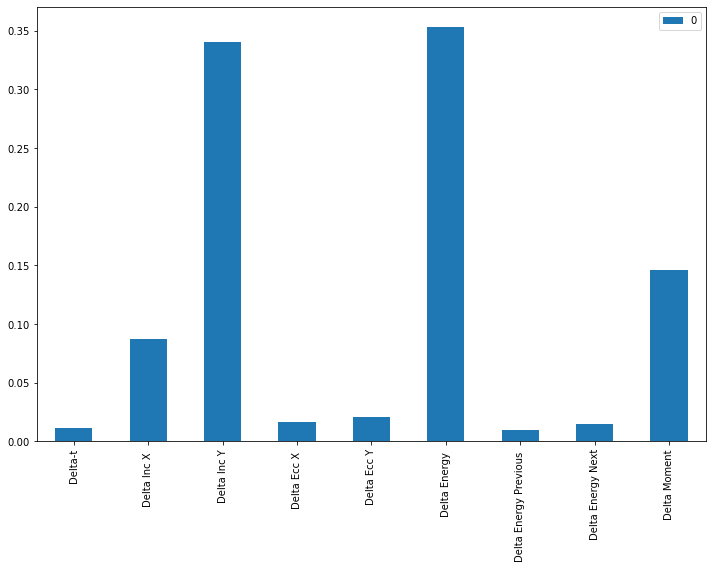

In [144]:

pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

 Suppresiion des variables initules
 Faudra faire le test d'Anova pour une meilleure selection des varibales

In [50]:
type(df["Maneuver type"])

pandas.core.series.Series

## Fonction de prédiction

In [55]:
def decodage(df):
    code = { 1:'1: East/West',
             2: '2: South/North'
             }
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [52]:
def detect_maneuvers (model, dataframe):
    df_copy = dataframe.copy()
    #Fonction de prédicton
    df_copy['Maneuver type'] = model.predict(dataframe)
    decodage(df_copy)   
    df_copy.to_excel("predict_Maneuvers_with3.xlsx")
    return df_copy
    

In [56]:
detect_maneuvers(AdaBoost, X_testr)

,Date,Delta-t,Delta Inc X,Delta Inc Y,Delta Ecc X,Delta Ecc Y,Delta Energy,Delta Energy Previous,Delta Energy Next,Delta Moment,Delta Out-of-plane,Delta Along-track,Delta Along-track avg,Maneuver type
1000,25140.783803,0.997257,0.000005,-0.000012,0.000007,0.000000,-14.550189,-13.513155,-15.932903,0.000027,-9552.919419,22224.764878,2277.147186,0
1001,25141.781057,0.997254,0.000011,-0.000021,0.000005,0.000002,-15.932903,-14.550189,138.180332,0.000048,-8665.605015,20223.131757,930.871115,0
1002,25142.778295,0.997238,-0.000031,0.000025,0.000022,-0.000013,138.180332,-15.932903,-5.845286,0.000080,-12821.469226,3425.444317,-15590.812137,1
1003,25143.775579,0.997283,0.000002,0.000007,0.000004,-0.000000,-5.845286,138.180332,-15.493132,0.000014,-13118.575086,22684.156082,1397.598421,0
1004,25144.772859,0.997280,0.000002,0.000016,0.000002,0.000004,-15.493132,-5.845286,-29.697718,0.000032,-15082.636791,22822.995471,1640.909185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,25532.132438,0.293866,-0.000054,0.000018,-0.000000,0.000002,-5.939461,-19.389695,-12.413147,0.000113,5474.975202,14507.738466,799.663395,0
1555,25532.771737,0.639298,0.000026,-0.000003,0.000001,-0.000001,-12.413147,-5.939461,-7.699286,0.000053,-15703.381617,13504.164918,219.027938,0
1556,25533.142255,0.370518,0.000019,-0.000006,-0.000001,0.000002,-7.699286,-12.413147,-12.884505,0.000040,7276.431333,13185.835738,401.718375,0
1557,25533.848596,0.706341,0.000036,0.000016,0.000000,-0.000001,-12.884505,-7.699286,-8.013525,0.000078,-15782.724369,12066.395108,2301.136594,0


In [58]:
y_testr

1000    0
1001    0
1002    1
1003    0
1004    0
       ..
1554    0
1555    0
1556    0
1557    0
1558    0
Name: Maneuver type, Length: 559, dtype: int64

### DATA RECOVERY

In [64]:
import requests
import numpy as np
import math
import json
import statistics
import matplotlib.dates as mdates
from matplotlib import ticker
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from pyorbital.orbital import Orbital
from tletools import TLE
from sgp4.api import days2mdhms, Satrec, jday
from datetime import date, datetime, timedelta
import datetime as dt
import io
import astropy
import pymap3d
from sgp4.api import Satrec
from sgp4.api import SGP4_ERRORS
from astropy.time import Time
from astropy.coordinates import TEME, CartesianDifferential, CartesianRepresentation
from astropy import units as u
from astropy.coordinates import ITRS
from jdcal import gcal2jd, jd2gcal

In [132]:
#code jusque la ligne 113 pour se connecter au site
class MyError(Exception):
    def __init___(self,args):
        Exception.__init__(self,"my exception was raised with arguments {0}".format(args))
        self.args = args

# URL des requêtes
uriBase      = "https://www.space-track.org"
requestLogin = "/ajaxauth/login"
requestCmdAction  = "/basicspacedata/query"
requestCustomSat1 = "/class/satcat/SATNAME/"
requestCustomSat2 = "/orderby/NORAD_CAT_ID asc/emptyresult/show"
requestFindCustom1 = "/class/gp_history/NORAD_CAT_ID/"
requestFindCustom2 = "/orderby/TLE_LINE1%20ASC/EPOCH/"
requestFindCustom3 = "/format/tle"

# URL des données de Sentinel 3B des 3 dernières semaines
#requestFindSentinel = "https://www.space-track.org/basicspacedata/query/class/gp_history/NORAD_CAT_ID/43437/orderby/TLE_LINE1%20ASC/EPOCH/2021-08-31--2021-09-21/format/tle"

# Identifiant de connexion à l'API
configUsr = "engel@et.esiea.fr"
configPwd = "ESIEA2021-20224A"
siteCred = {'identity': configUsr, 'password': configPwd}

# use requests package to drive the RESTful session with space-track.org
with requests.Session() as session:
    # run the session in a with block to force session to close if we exit

    # need to log in first. note that we get a 200 to say the web site got the data, not that we are logged in
    resp = session.post(uriBase + requestLogin, data = siteCred)
    if resp.status_code != 200:
        raise MyError(resp, "POST fail on login")
        
    #customSat = input("Veuilez entrer le nom du satellite : ")
    customSat = 'SENTINEL 3B'
    #customSat = 'LUCH %28OLYMP%29'
    #customSat = 'EUTE 21B'
    
    # Requête pour avoir le NORAD_CAT_ID de l'objet voulu
    resp = session.get(uriBase + requestCmdAction + requestCustomSat1 + customSat + requestCustomSat2)
    if resp.status_code != 200:
        print(resp)
        raise MyError(resp, "GET fail on request for " + customSat)

    # use the json package to break the json formatted response text into a Python structure (a list of dictionaries)
    retData = json.loads(resp.text)
    satCount = len(retData)
    catId = 0
    
    # Si la réponse est vide, alors le nom du satellite est faux
    if not retData:
        raise MyError(retData, "Nom de satellite \"" + customSat + "\" invalide")
        
    for e in retData:
        # each e describes the latest elements for one Starlink satellite. We just need the NORAD_CAT_ID 
        
        # Si le champ NORAD_CAT_ID est vide, alors le satellite n'existe pas
        if not 'NORAD_CAT_ID' in e or len(e['NORAD_CAT_ID']) == 0:
            raise MyError(e, "Satellite \"" + customSat + "\" inconnu")
        catId = e['NORAD_CAT_ID']
        #satIds.append(catId)
        #break

    # On demande les date de début et de fin de recherche
    
    #dateDebut = input ("Veuillez entrer la date de début (format AAAA-MM-JJ avec les tirets) : ")
    #dateFin  = input ("Veuillez entrer la date de fin (format AAAA-MM-JJ avec les tirets) : ")
    
    dateDebut = '2018-04-25'
    dateFin = '2019-05-27'
        
    # Récupère le résultat de la requête custom
    resp = session.get(uriBase + requestCmdAction + requestFindCustom1 + catId + requestFindCustom2 + dateDebut + "--" + dateFin + requestFindCustom3)
    if resp.status_code != 200:
        print(resp)
        raise MyError(resp, "GET fail on request for " + customSat)

    # Assigne le résultat ligne par ligne
    retData = resp.text.splitlines()
    
    # Affiche uniquement la première coordonnée (utile que pour tester)
    
    #tle_rec = ephem.readtle("Sentinelle 3B", retData[0], retData[1])
    #tle_rec.compute()
    #print (tle_rec.sublong, tle_rec.sublat)
    
    
    
    
    L_1 = [] # Tableau des lignes "1"
    L_2 = [] # Tableau des lignes "2"
    
    L_1_bis = []
    L_2_bis = []
    
    i = 1
    
    # Pour chaque ligne de la réponse, on alterne entre 1 et 2
    for line in retData:
        j = i
        if i == 1:
            # Si c'est 1, on ajoute la ligne qu'on est en train de lire à L_1
            L_1.append(line[:69])
            L_1_bis.append(line[:69])
            j = 2
        elif i == 2:
            # Si c'est 2, on ajoute la ligne qu'on est en train de lire à L_2
            L_2.append(line[:69])
            L_2_bis.append(line[:69])
            j = 1
        # On alterne 1 et 2
        i = j
    
    
    L_mean_motion=[]
    L_energie=[]
    L_delta_energie=[]
    L_inclinaison=[]
    
    #Variable pour l'IA
    L_inclinaisonX=[]
    L_inclinaisonY=[]
    L_excentricite=[]
    L_excentriciteX=[]
    L_excentriciteY=[]
    L_delta_EnergFinal=[]
    max_energy = 1000
    Delta_Energy_Prev=[]
    Delta_Energy_Next=[]
    
    ##
    
    L_argp=[]
    L_raan=[]
    L_mean_anomaly=[]
    
    L_x=[]
    L_y=[]
    L_z=[]
    
    L_lat_ecef =[]
    L_long_ecef =[]
    L_D_ecef =[]
    
    L_x_ecef=[]
    L_y_ecef=[]
    L_z_ecef=[]
    
    L_longitude=[]
    L_latitude=[]
    L_altitude=[]
    L_position=[]
    L_vitesse=[]
    
    L_detection_manoeuvre=[]
    
    dates=[]
    dates_detection_manoeuvre=[]
    dates_MJD2000=[]
    Temps=[]
    Temps_MJD=[]
    L_a=[]
    
    NbTLE = 0
    
    MU = 3.986004415 * 10 ** 14 
    k = 0
    TLES=[]
    TLES_IA=[]
    
    #Initialisation de toutes les listes crées plus haut
    
    tle = TLE.from_lines(customSat, L_1[0], L_2[0])
    
        
    month, day, hour, minute, second = days2mdhms(tle.epoch_year,tle.epoch_day)
    temps = datetime(tle.epoch_year, month, day,hour)
    Temps.append(temps)
    #On separe les secondes et milisecondes
    p=str(second)
    SEC = int(p.partition(".")[0])
    try :
        MILI = int(p.partition(".")[2])
    except ValueError: 
        MILI = 0

    #on converti en format jd pour le traitement
    t = Time(datetime(tle.epoch_year,month,day,hour,minute,SEC,MILI))
    t.format = 'mjd'
    #on ajoute ca a une liste pour la partie ia
    dates_MJD2000.append(t.value)
    
    Temps_MJD.append(t.value)
    

    date_actuelle = datetime(tle.epoch_year,month,day,hour,minute,SEC,MILI)
    dates.append(date_actuelle)
    
    ## CALCUL DE LA LONGITUDE (pour l'initialisation k=0)
    satellite = Satrec.twoline2rv(L_1[0],L_2[0])
    
    #format datetime creeé
    date_astropy = datetime(tle.epoch_year,month,day,hour,minute,SEC)
    #print(date_astropy)
    
    t = Time(date_astropy, format='datetime')
    #ici, on genere le vecteur position x,y,z en cartésien et le vecteur position
    error_code, teme_p, teme_v = satellite.sgp4(t.jd1, t.jd2)  # in km and km/s
    if error_code != 0:
        raise RuntimeError(SGP4_ERRORS[error_code])
        
    L_position.append(teme_p)
    #print(teme_p)
    
    L_x.append(L_position[0][0]) #on stocke x (en km)
    L_y.append(L_position[0][1])
    L_z.append(L_position[0][2])
    
    stringbis =pymap3d.eci2ecef(L_x[-1],L_y[-1],L_z[-1],date_astropy) ##ici eci to ecef
    L_x_ecef.append(stringbis[0]) 
    L_y_ecef.append(stringbis[1])  
    L_z_ecef.append(stringbis[2])
    
    ##
    
    
    #rien d'interressant jusqua la ligne 260
    
    
    # Calcul de l'Energie du satellite
    L_energie.append((-1/2 )*((MU*2*math.pi*(float(tle.n)/86400)))**(2/3) )  
    L_inclinaison.append(float(tle.inc))
    L_excentricite.append(float(tle.ecc))
    L_argp.append(float(tle.argp))
    L_raan.append(float(tle.raan))
    L_mean_motion.append(float(tle.n))
    L_mean_anomaly.append(float(tle.M))
    L_a.append(float(tle.a))
    Delta_Energy_Prev.append(0)
    Delta_Energy_Next.append(0)
    

    NbTLE = NbTLE +1
    
    #print("Je prends cette date: ", date_actuelle,"\n")
            
        
        
    # Pour chaque duo de ligne, on sort les coordonnées
    while k < len(L_1):
        tle = TLE.from_lines(customSat, L_1[k], L_2[k])
        
        TLES.append(tle)
        
        #on charge les données relatives au temps
        month, day, hour, minute, second = days2mdhms(tle.epoch_year,tle.epoch_day)
        
        t = Time(datetime(tle.epoch_year,month,day,hour,minute,SEC,MILI))
        t.format = 'mjd'
        
        
        #on stocke la date de la tle pour pouvoir selectionner les tle espacées de 12h
        temps = datetime(tle.epoch_year, month, day,hour)
        Temps_MJD.append(t.value)
        #print("difference =",t.value-Temps_MJD[-2])
        
        if ( t.value - Temps_MJD[-2] >0.25) :  #0.5 en mjd correspond à 12h après la date mjd 0 

            Temps.append(temps)
            month, day, hour, minute, second = days2mdhms(tle.epoch_year,tle.epoch_day)
            
            t = Time(datetime(tle.epoch_year,month,day,hour,minute,SEC,MILI))
            t.format = 'jd'
            dates_MJD2000.append(t.value)
            
            
            p=str(second)
            SEC = int(p.partition(".")[0]) 
            try :
                MILI = int(p.partition(".")[2])
            except ValueError: 
                MILI = 0
         
            date_actuelle = datetime(tle.epoch_year,month,day,hour,minute,SEC,MILI)
            # récupération de la date
            dates.append(date_actuelle)
            
            satellite = Satrec.twoline2rv(L_1[k],L_2[k])
    
            date_astropy = datetime(tle.epoch_year,month,day,hour,minute,SEC)

            t = Time(date_astropy, format='datetime')
            error_code, teme_p, teme_v = satellite.sgp4(t.jd1, t.jd2)  # in km and km/s
            if error_code != 0:
                raise RuntimeError(SGP4_ERRORS[error_code])

            L_position.append(teme_p)
            #print(teme_p)

            
            L_x.append(L_position[-1][0]) #pareil 
            L_y.append(L_position[-1][1])
            L_z.append(L_position[-1][2])
            
            #conversion eci to ecef puis cart_to_sphe
            stringbis =pymap3d.eci2ecef(L_x[-1],L_y[-1],L_z[-1],date_astropy) ##ici eci to ecef
            L_x_ecef.append(stringbis[0]) 
            L_y_ecef.append(stringbis[1])  #phi = lat , theta=long , rho = distance
            L_z_ecef.append(stringbis[2])
            #donc la c'est en ecef
        
            
    
            #on a stocké tous les parametres cartésiens 
            #rien d'interressant jusqua la ligne 313
        
            # Calcul de l'Energie du satellite
            L_energie.append((-1/2 )*((MU*2*math.pi*(float(tle.n)/86400)))**(2/3) )  #mu = 398 600,441 km**3/s**2
            L_inclinaison.append(float(tle.inc))
            
            L_excentricite.append(float(tle.ecc))
            L_argp.append(float(tle.argp))
            L_raan.append(float(tle.raan))
            L_mean_motion.append(float(tle.n))
            L_mean_anomaly.append(float(tle.M))
            L_a.append(float(tle.a))
            
           # Calcul des de Ix, Iy, Ex , Xy
           
            L_inclinaisonX.append(math.sin(float(tle.inc)/2) * math.cos(float(tle.raan)))
            L_inclinaisonY.append(math.sin(float(tle.inc)/2) * math.sin(float(tle.raan)))
           # L_delta_energie.append(((-1/2 )*((MU*2*math.pi*(float(tle.n)/86400)))**(2/3))-L_energie[k-1])
            L_excentriciteX.append( float(tle.ecc) * math.cos(float(tle.argp) + float(tle.raan)))
            L_excentriciteY.append(float(tle.ecc) * math.cos(float(tle.argp) + float(tle.raan)))
            #L_delta_EnergFinal.append(float(min(max(L_delta_energie[k-1],-max_energy),max_energy)))
            #Delta_Energy_Prev.append(min(max(Delta_Energy_Prev[k-1],-max_energy),max_energy))
            #Delta_Energy_Next.append(min(max(Delta_Energy_Next[k-1],-max_energy),max_energy) )  
           
            NbTLE = NbTLE +1
            
            #print("Je prends cette date: ", date_actuelle)
            #print("Différence avec la tle précédente: ",temps - Temps[-2],"\n")

        else : 
            p=str(second)
            SEC = int(p.partition(".")[0])
            try :
                MILI = int(p.partition(".")[2])
            except ValueError: 
                MILI = 0
         
            date_pas_prise = datetime(tle.epoch_year,month,day,hour,minute,SEC,MILI)
            
            #print("Je ne prends pas cette date: ",date_pas_prise)
            #print("Difference:",temps - Temps[-1])
            
        k = k + 1
        
    
    
    
        
    for i in range(len(L_energie)-1) : 
        #calcul du delta energie
        L_delta_energie.append(L_energie[i+1]-L_energie[i])
        L_delta_EnergFinal.append(float(min(max(L_delta_energie[i],-max_energy),max_energy)))
        Delta_Energy_Prev.append(min(max(Delta_Energy_Prev[i],-max_energy),max_energy))
        Delta_Energy_Next.append(min(max(Delta_Energy_Next[i],-max_energy),max_energy) )  
           
   
    
    Lix = pd.DataFrame( columns = ['Date','Delta Inc X','Delta Inc Y','Delta Ecc X','Delta Ecc Y','Delta Energy','Delta Energy Previous','Delta Energy Next'])
    
#print(dates_MJD2000)
# Fermeture de la session avec l'API et fin du programme
session.close()
#print("Completed session")    

In [133]:
Lix['Date'] = dates

In [141]:
#L_inclinaisonX.append(4)
L_inclinaisonY.append(4)
L_excentriciteX.append(4)
L_excentriciteY.append(4)
L_delta_energie.append(4)
Delta_Energy_Prev.append(4)
Delta_Energy_Next.append(4)

In [147]:
#Lix['Delta Inc X'] = L_inclinaisonX
Lix['Delta Inc Y'] = L_inclinaisonY
Lix['Delta Ecc X'] = L_excentriciteX
Lix['Delta Ecc Y'] = L_excentriciteY
Lix['Delta Energy'] = L_delta_energie
Lix['Delta Energy Previous'] = Delta_Energy_Prev
Lix['Delta Energy Next'] = Delta_Energy_Next

In [148]:
Lix

,Date,Delta Inc X,Delta Inc Y,Delta Ecc X,Delta Ecc Y,Delta Energy,Delta Energy Previous,Delta Energy Next
0,2018-04-25 21:39:06.149664,0.264374,-0.771512,-0.000850,-0.000850,19714.782262,1,1
1,2018-04-26 03:44:29.023008,0.466389,-0.668540,-0.000882,-0.000882,235.042257,1,1
2,2018-04-26 10:28:56.503776,0.630339,-0.517035,-0.000708,-0.000708,-39.480837,1,1
3,2018-04-26 17:13:24.054096,0.747329,-0.326027,-0.000423,-0.000423,-15.426452,1,1
4,2018-04-26 23:57:51.095088,0.813538,-0.054316,0.000856,0.000856,-103.262403,1,1
...,...,...,...,...,...,...,...,...
599,2019-05-24 19:55:48.520416,-0.355201,0.735517,0.000030,0.000030,-0.415002,1,1
600,2019-05-25 06:01:43.756896,-0.688408,0.439599,-0.000038,-0.000038,-0.363126,1,1
601,2019-05-25 19:29:37.004064,-0.813866,0.069100,-0.000074,-0.000074,-0.661409,1,1
602,2019-05-26 07:16:31.845504,-0.752667,-0.317247,-0.000030,-0.000030,-0.298282,1,1


In [ ]:
detect_maneuvers(AdaBoost,Lix)